In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrices import accuracy_score

In [287]:
#DATA COLLECTION AND PROCESSING:
#load the data from csv file to pandas Dataframe:
titanic_data=pd.read_csv('data/train.csv')

In [289]:
titanic_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [293]:
# Printing First 5 rows of the Dataframes :
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [199]:
# Getting some information about the data :
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [201]:
#check the number of missing values in each columns:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

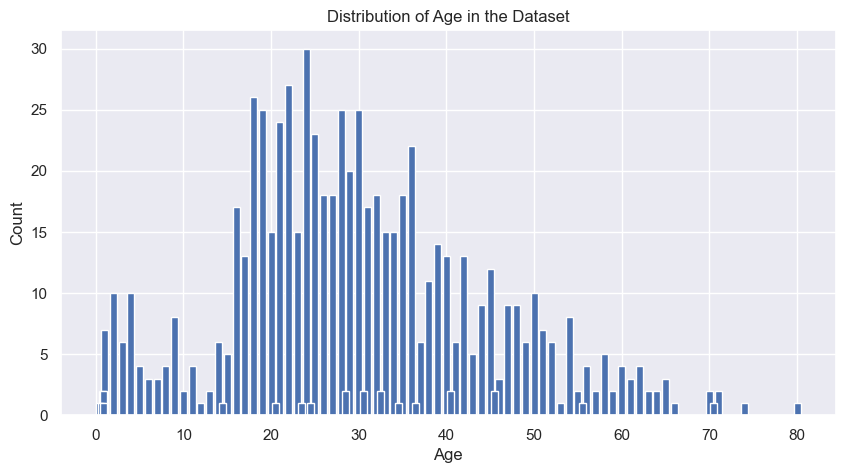

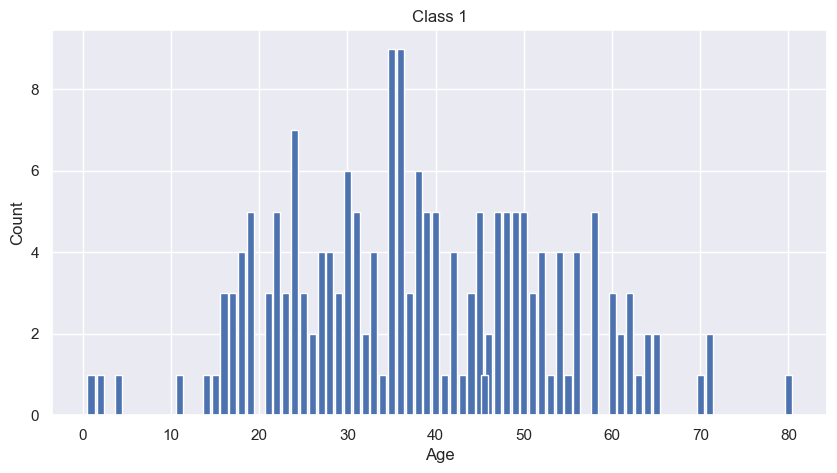

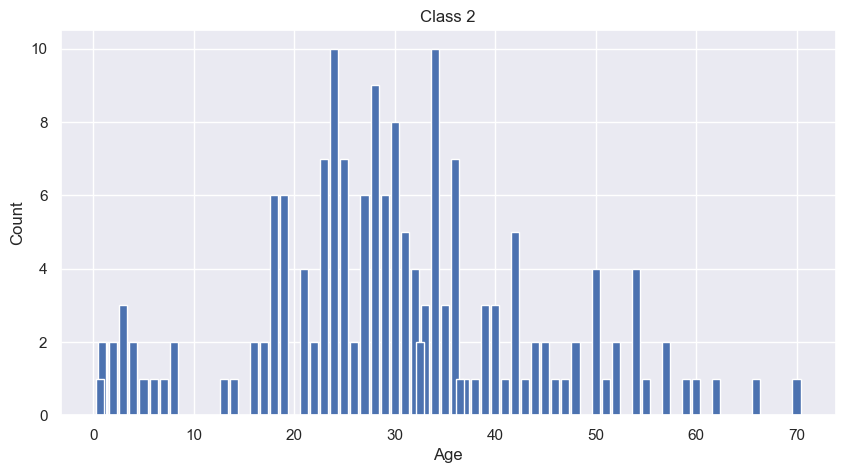

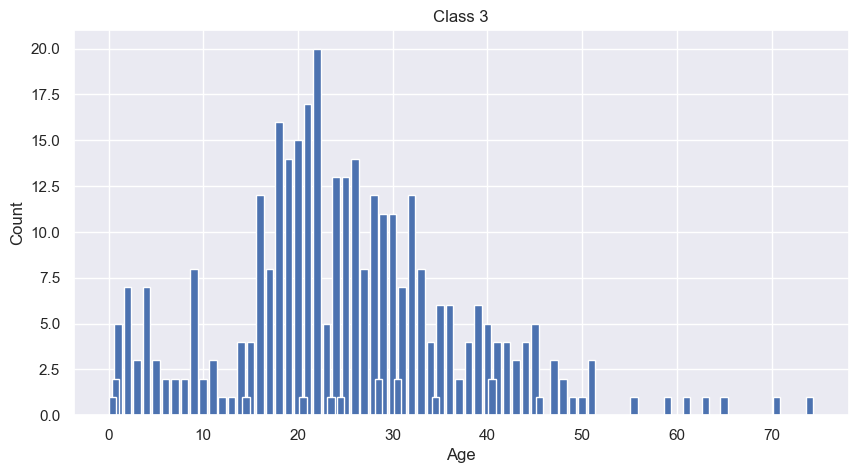

         Age
Pclass      
1       37.0
2       29.0
3       24.0


In [285]:
# Count the frequency of each unique value in the 'Age' column
y = titanic_data['Age'].value_counts()

# Get the unique values (x-axis) from the index of the Series
x = y.index.values

# Plot the frequencies
plt.figure(figsize=(10, 5))
plt.bar(x, y)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age in the Dataset')
plt.show()


class_age = titanic_data[['Pclass', 'Age']]  # Assuming 'titanic_data' contains the dataset

for i in range(1, 4):
    plt.figure(figsize=(10, 5))
    plt.title(f'Class {i}')  # Fixed the syntax for title
    y = class_age[class_age['Pclass'] == i]['Age'].value_counts()
    x = y.index.values
    plt.bar(x, y)
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()

medians=class_age.groupby('Pclass').median()
print(medians)







In [295]:
#Handling the missing values:
#drop the "Cabin",column from the dataframes:
titanic_data=titanic_data.drop(columns='Cabin',axis=1)

In [311]:
#replacing the missing values in "age " column with the mean values:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)


C:\Users\mayan\AppData\Local\Temp\ipykernel_23316\1205745824.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)


In [309]:
  # Finding the mode value of "Embarked " column
print(titanic_data['Embarked'].mode())



      

0    S
Name: Embarked, dtype: object


In [307]:
print(titanic_data['Embarked'].mode()[0])



S


In [209]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [313]:
#DATA ANALYSIS:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [315]:
#finding the number of people survived and not survived 
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [317]:
#DATA VISULIZATION:
sns.set()

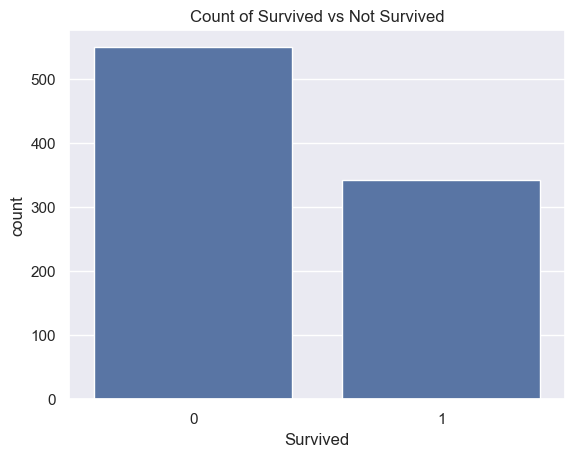

In [319]:

import seaborn as sns
import matplotlib.pyplot as plt

# Making a count plot for the "Survived" column
sns.countplot(x="Survived", data=titanic_data)

# Show the plot
plt.title("Count of Survived vs Not Survived")
plt.show()


In [321]:
# conut for sex:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

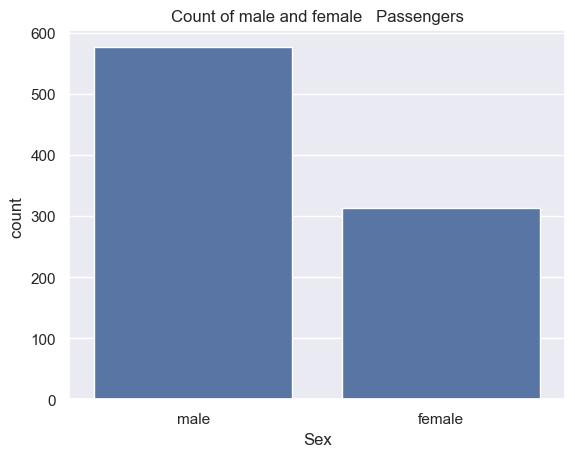

In [323]:
# making a count plot for 'sex' column
import seaborn as sns
import matplotlib.pyplot as plt

# Making a count plot for the 'Sex' column
sns.countplot(x="Sex", data=titanic_data)

# Setting axis labels
plt.xlabel("Sex")
plt.ylabel("count ")
plt.title("Count of male and female   Passengers")

# Display the plot
plt.show()


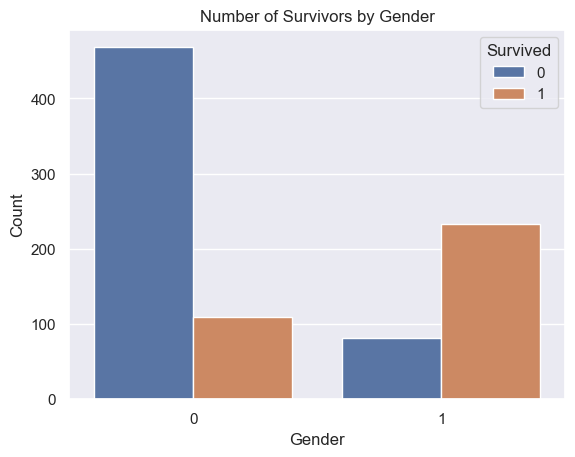

In [149]:
#making a plot vs gender and number of survivors.
import seaborn as sns
import matplotlib.pyplot as plt

# Number of survivors, gender-wise
sns.countplot(x='Sex', hue='Survived', data=titanic_data)

# Setting plot labels and title
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Number of Survivors by Gender")

# Display the plot
plt.show()


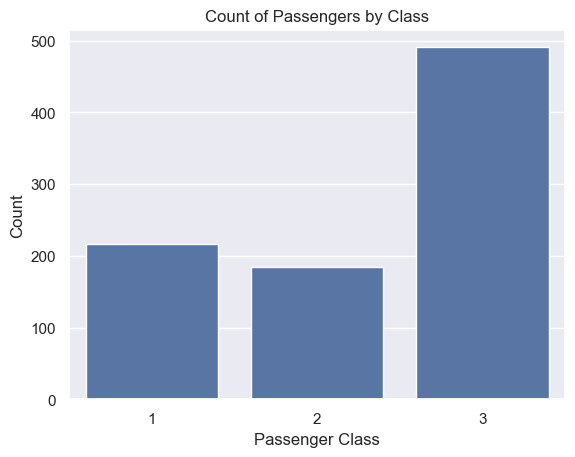

In [165]:
# making a count plot for "Pclass" column 
import seaborn as sns
import matplotlib.pyplot as plt

# Making a count plot for the "Pclass" column
sns.countplot(x='Pclass', data=titanic_data)

# Setting axis labels and title
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.title("Count of Passengers by Class")

# Display the plot
plt.show()


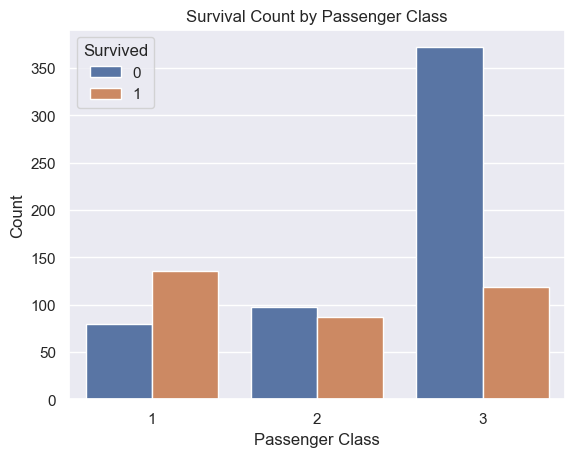

In [151]:
#
import seaborn as sns
import matplotlib.pyplot as plt

# Making a count plot for the "Pclass" column with "Survived" as hue
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

# Setting axis labels and title
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.title("Survival Count by Passenger Class")

# Display the plot
plt.show()


In [153]:
#Encoding and Caategorical Columns :
titanic_data['Sex'].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

In [155]:
titanic_data['Embarked'].value_counts()

Embarked
0.0    646
1.0    168
2.0     77
Name: count, dtype: int64

In [163]:
# covering categorical for columns:

# Replacing values in 'Sex' and 'Embarked' columns
titanic_data.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)


In [165]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0.0


In [231]:
#SEPERATING FEATURES AND TARGET :
x=titanic_data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
y=titanic_data['Survived']

In [183]:
print(x)

     Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0         3    0  22.0      1      0   7.2500        S
1         1    1  38.0      1      0  71.2833        C
2         3    1  26.0      0      0   7.9250        S
3         1    1  35.0      1      0  53.1000        S
4         3    0  35.0      0      0   8.0500        S
..      ...  ...   ...    ...    ...      ...      ...
886       2    0  27.0      0      0  13.0000        S
887       1    1  19.0      0      0  30.0000        S
888       3    1   NaN      1      2  23.4500        S
889       1    0  26.0      0      0  30.0000        C
890       3    0  32.0      0      0   7.7500        Q

[891 rows x 7 columns]


In [169]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [233]:
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame called titanic_data
# Define the feature matrix 'X' and target vector 'y'
X = titanic_data[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]  # Features
y = titanic_data['Survived']  # Target variable

# Splitting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Now you can use x_train, x_test, y_train, y_test for model training and evaluation


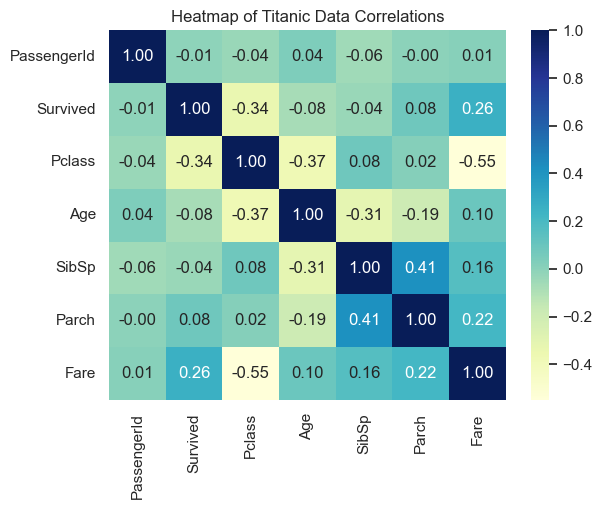

In [350]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


titanic_data = pd.read_csv('data/train.csv')


numeric_data = titanic_data.select_dtypes(include=['float64', 'int64'])


correlation_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Heatmap of Titanic Data Correlations")
plt.show()


In [329]:
#LOGISTIC REGRESSION:
 #training the logistic Regression model with training data:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the Titanic dataset
titanic_data = pd.read_csv('data/train.csv')

# Encode categorical columns
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})  # Encode gender
titanic_data['Embarked'] = titanic_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})  # Encode embarkation points

# Drop rows with missing values (if any)
titanic_data.dropna(inplace=True)

# Define feature matrix X and target vector y
X = titanic_data[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]  # Example features
y = titanic_data['Survived']  # Target variable

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model with training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression Model: {accuracy * 100:.2f}%")


Accuracy of Logistic Regression Model: 75.68%


In [331]:
#Accuracy of train prediction:
x_train_prediction=model.predict(x_train)


In [354]:
print(x_train_prediction)

[0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1
 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1]


In [356]:
from sklearn.metrics import accuracy_score

# Predict on the training data
x_train_prediction = model.predict(x_train)

# Print the predictions
print("Predictions on Training Data:", x_train_prediction)

# Calculate and print the training accuracy
train_accuracy = accuracy_score(y_train, x_train_prediction)
print("Training Accuracy:", train_accuracy)


Predictions on Training Data: [0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1
 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1]
Training Accuracy: 0.773972602739726


In [335]:
#accuracy on test prediction :
x_test_prediction= model.predict(x_test)


In [352]:
from sklearn.metrics import accuracy_score

# Predict on the test data
x_test_prediction = model.predict(x_test)

# Print the predictions
print("Predictions on Test Data:", x_test_prediction)

# Calculate and print the accuracy
test_accuracy = accuracy_score(y_test, x_test_prediction)
print("Test Accuracy:", test_accuracy)


Predictions on Test Data: [1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1]
Test Accuracy: 0.7567567567567568


In [337]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0.0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,0.0
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,0.0


In [339]:

titanic_data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,0.480874,35.674426,0.464481,0.475410,78.682469,0.377049
std,247.052476,0.470725,0.515187,0.501005,15.643866,0.644159,0.754617,76.347843,0.508086
min,2.000000,0.000000,1.000000,0.000000,0.920000,0.000000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,0.000000,24.000000,0.000000,0.000000,29.700000,0.000000
50%,457.000000,1.000000,1.000000,0.000000,36.000000,0.000000,0.000000,57.000000,0.000000
75%,676.000000,1.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000,1.000000
max,890.000000,1.000000,3.000000,1.000000,80.000000,3.000000,4.000000,512.329200,2.000000


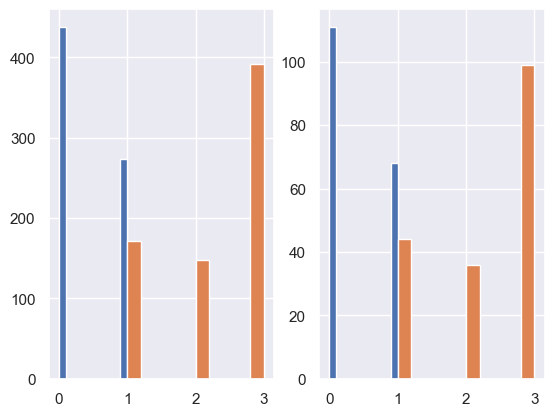

In [341]:
plt.subplot(1,2,1)
strat_train1_set['Survived'].hist()
strat_train1_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test1_set['Survived'].hist()
strat_test1_set['Pclass'].hist()

plt.show()





In [348]:
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd

# Load the Titanic dataset
titanic_data = pd.read_csv('data/train.csv')

# Encode the 'Sex' column (convert to numeric)
titanic_data["Sex"] = titanic_data["Sex"].map({"male": 0, "female": 1})

# Stratified shuffle split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform the stratified split
for train1_indices, test1_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]):
    # Correctly reference train1_indices and test1_indices
    strat_train1_set = titanic_data.loc[train1_indices]
    strat_test1_set = titanic_data.loc[test1_indices]

# Display the sizes of the splits
print("Train Set Size:", len(strat_train1_set))
print("Test Set Size:", len(strat_test1_set))


Train Set Size: 712
Test Set Size: 179


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

# Load the Titanic dataset
titanic_data = pd.read_csv('data/train1.csv')

# Preprocess the data: Select relevant features
# Ensure 'Survived', 'Pclass', and 'Sex' columns exist
titanic_data = titanic_data.dropna(subset=["Survived", "Pclass", "Sex"])  # Handle missing data if any

# Encode the 'Sex' column (convert to numerical values)
titanic_data["Sex"] = titanic_data["Sex"].map({"male": 0, "female": 1})

# Stratified shuffle split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform the split
for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]):
    train_set = titanic_data.iloc[train_indices]
    test_set = titanic_data.iloc[test_indices]

# Display results
print("Train Set Size:", len(train_set))
print("Test Set Size:", len(test_set))
print("\nSample Train Set:\n", train_set.head())
print("\nSample Test Set:\n", test_set.head())


In [69]:
strat_train1_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 191 to 407
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    int64  
 5   Age          574 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        168 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 72.3+ KB
